In [1]:
#Load pandas and numpy libraries in the first cell of the notebook
import pandas as pd
import numpy as np


In [4]:
#Read in the household_power_consumption.csv data from the Datasets directory, and list the first few rows
data_fn = 'household_power_consumption.csv'
file_path = 'C:/Users/15039/OneDrive/Desktop/5310/assignments/PandasAssinments/Assignment_6_Data/' + data_fn
home_elec = pd.read_csv(file_path, sep=';', low_memory=False)

# Display the first few rows of the DataFrame
print(home_elec.head())

       Date      Time Global_active_power Global_reactive_power  Voltage  \
0  1/8/2008  00:00:00               0.500                 0.226  239.750   
1  1/8/2008  00:01:00               0.482                 0.224  240.340   
2  1/8/2008  00:02:00               0.502                 0.234  241.680   
3  1/8/2008  00:03:00               0.556                 0.228  241.750   
4  1/8/2008  00:04:00               0.854                 0.342  241.550   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0            2.400          0.000          0.000             1.0  
1            2.200          0.000          0.000             1.0  
2            2.400          0.000          0.000             0.0  
3            2.600          0.000          0.000             1.0  
4            4.000          0.000          1.000             7.0  


In [5]:
#You should inspect the data types of the columns
home_elec.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [6]:
#Make a quick visualization to understand the timeframe of the data. Your plan is to identify a year with complete data and focus on that
for col in home_elec.columns:
    print('information for column ' + 
          col + 
          ':\n', 
          home_elec[col].describe())

information for column Date:
 count      1049760
unique         729
top       1/8/2008
freq          1440
Name: Date, dtype: object
information for column Time:
 count      1049760
unique        1440
top       00:00:00
freq           729
Name: Time, dtype: object
information for column Global_active_power:
 count     1049760
unique       3852
top             ?
freq         9570
Name: Global_active_power, dtype: object
information for column Global_reactive_power:
 count     1049760
unique        510
top         0.000
freq       230359
Name: Global_reactive_power, dtype: object
information for column Voltage:
 count     1049760
unique       2738
top             ?
freq         9570
Name: Voltage, dtype: object
information for column Global_intensity:
 count     1049760
unique        207
top         1.400
freq        81879
Name: Global_intensity, dtype: object
information for column Sub_metering_1:
 count     1049760
unique         89
top         0.000
freq       955562
Name: Sub_metering

<Axes: xlabel='Date'>

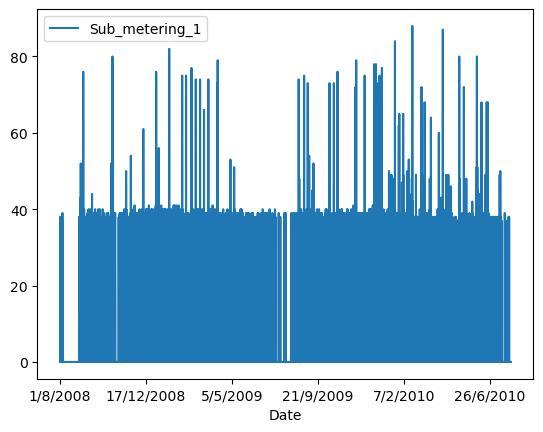

In [9]:
home_elec.replace('?', np.nan, inplace = True)
home_elec.interpolate(inplace = True)
for col in home_elec.columns[2:]:
    home_elec[col] = home_elec[col].astype(float)
(home_elec[['Date', 
            'Sub_metering_1']].
             plot(x = 'Date', 
                  y = 'Sub_metering_1'))

In [21]:
#Using the year you identified, create a new DataFrame having Date, Time, and Kitchen_power_use. Note that Sub_metering_1 is the kitchen
kitchen_elec = home_elec.loc[home_elec['Date'].str.contains('2009'), ['Date', 'Time', 'Sub_metering_1']]
kitchen_elec.columns = ['Date', 'Time', 'Kitchen_power_use']
kitchen_elec.reset_index(drop=True, inplace=True)
kitchen_elec.head()

,Date,Time,Kitchen_power_use
0,1/1/2009,00:00:00,0.0
1,1/1/2009,00:01:00,0.0
2,1/1/2009,00:02:00,0.0
3,1/1/2009,00:03:00,0.0
4,1/1/2009,00:04:00,0.0


In [22]:
#Date and Time are strings; combine them on each row, then convert the combined string to a datetime, and store that in a new column called timestamp
kitchen_elec.loc[:, 'timestamp'] = \
    pd.to_datetime(kitchen_elec.loc[:, 'Date'] + ' '
                   + kitchen_elec.loc[:, 'Time'],
                  dayfirst = True)
kitchen_elec.sort_values('timestamp', 
                         inplace = True)
kitchen_elec.head()

,Date,Time,Kitchen_power_use,timestamp
0,1/1/2009,00:00:00,0.0,2009-01-01 00:00:00
1,1/1/2009,00:01:00,0.0,2009-01-01 00:01:00
2,1/1/2009,00:02:00,0.0,2009-01-01 00:02:00
3,1/1/2009,00:03:00,0.0,2009-01-01 00:03:00
4,1/1/2009,00:04:00,0.0,2009-01-01 00:04:00


In [23]:
#Create an hour and date column using methods on the timestamp column to represent the hour of the day and the date in a standard format
kitchen_elec['hour'] = \
    kitchen_elec['timestamp'].dt.hour
kitchen_elec['date'] = \
    kitchen_elec['timestamp'].dt.date
kitchen_elec.head()

,Date,Time,Kitchen_power_use,timestamp,hour,date
0,1/1/2009,00:00:00,0.0,2009-01-01 00:00:00,0,2009-01-01
1,1/1/2009,00:01:00,0.0,2009-01-01 00:01:00,0,2009-01-01
2,1/1/2009,00:02:00,0.0,2009-01-01 00:02:00,0,2009-01-01
3,1/1/2009,00:03:00,0.0,2009-01-01 00:03:00,0,2009-01-01
4,1/1/2009,00:04:00,0.0,2009-01-01 00:04:00,0,2009-01-01


In [24]:
#Group the data by date and hour aggregating Kitchen_power_use
kitchen_elec = \
    (kitchen_elec[['date',
                  'hour', 
                  'Kitchen_power_use']].
                  groupby(['date',
                           'hour']).sum())
kitchen_elec.reset_index(inplace = True)
kitchen_elec.iloc[20:28, :]

,date,hour,Kitchen_power_use
20,2009-01-01,20,0.0
21,2009-01-01,21,0.0
22,2009-01-01,22,0.0
23,2009-01-01,23,0.0
24,2009-01-02,0,0.0
25,2009-01-02,1,0.0
26,2009-01-02,2,0.0
27,2009-01-02,3,0.0


C:\Users\15039\AppData\Local\Temp\ipykernel_11916\176876396.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (kitchen_elec.loc[((kitchen_elec['date'] >=
C:\Users\15039\AppData\Local\Temp\ipykernel_11916\176876396.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (kitchen_elec['date'] <


<Axes: xlabel='hour'>

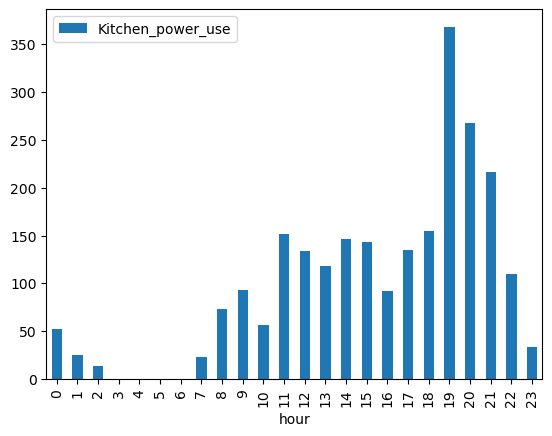

In [25]:
#For January, aggregate the data by hour and make a bar plot by hour of kitchen energy use
(kitchen_elec.loc[((kitchen_elec['date'] >= 
                    pd.to_datetime('2009-01-01')) & 
                   (kitchen_elec['date'] <
                    pd.to_datetime('2009-02-01'))),
                  ['hour',
                   'Kitchen_power_use']].
                   groupby('hour').mean().plot(kind = 
                                               'bar'))

<Axes: xlabel='hour'>

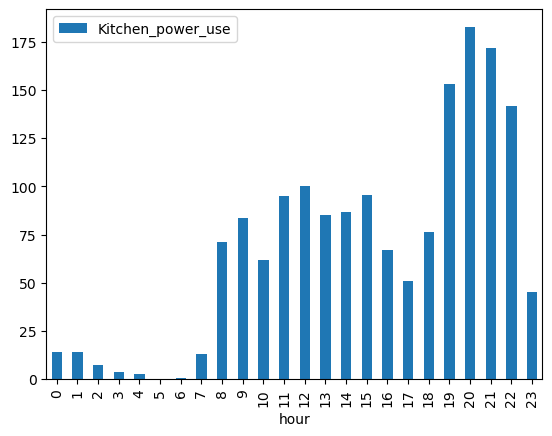

In [26]:
#You see that usage seems to begin around breakfast time, continue through the day with a peak at dinner time, then trail off. Make a similar plot for the entire year to compare
(kitchen_elec.loc[:,
                  ['hour', 
                   'Kitchen_power_use']].
                    groupby('hour').mean().plot(kind = 
                                                'bar'))